In [1]:
import numpy as np
import pandas as pd 


In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'] , inplace = True)

In [15]:
df = pd.get_dummies(df , columns= ['Geography' , 'Gender' ] , drop_first = True)

In [17]:
print(df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1          

In [18]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 1)

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled.shape

(8000, 11)

In [33]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [66]:
model = Sequential()
model.add(Dense(11,activation = 'relu' , input_dim = 11))
model.add(Dense(6,activation = 'relu' ))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [68]:
history = model.fit(X_train_scaled , y_train , epochs = 100 , validation_split = 0.2, verbose = 2)

Epoch 1/100
200/200 - 2s - loss: 0.6558 - accuracy: 0.6191 - val_loss: 0.5231 - val_accuracy: 0.7906 - 2s/epoch - 9ms/step
Epoch 2/100
200/200 - 1s - loss: 0.4747 - accuracy: 0.8009 - val_loss: 0.4500 - val_accuracy: 0.8106 - 735ms/epoch - 4ms/step
Epoch 3/100
200/200 - 1s - loss: 0.4324 - accuracy: 0.8200 - val_loss: 0.4298 - val_accuracy: 0.8144 - 657ms/epoch - 3ms/step
Epoch 4/100
200/200 - 1s - loss: 0.4187 - accuracy: 0.8284 - val_loss: 0.4207 - val_accuracy: 0.8156 - 692ms/epoch - 3ms/step
Epoch 5/100
200/200 - 1s - loss: 0.4104 - accuracy: 0.8291 - val_loss: 0.4132 - val_accuracy: 0.8175 - 685ms/epoch - 3ms/step
Epoch 6/100
200/200 - 1s - loss: 0.4042 - accuracy: 0.8334 - val_loss: 0.4062 - val_accuracy: 0.8225 - 665ms/epoch - 3ms/step
Epoch 7/100
200/200 - 1s - loss: 0.3980 - accuracy: 0.8378 - val_loss: 0.3997 - val_accuracy: 0.8263 - 678ms/epoch - 3ms/step
Epoch 8/100
200/200 - 1s - loss: 0.3925 - accuracy: 0.8397 - val_loss: 0.3939 - val_accuracy: 0.8288 - 654ms/epoch - 3ms/

In [69]:
model.layers[0].get_weights()

[array([[-0.41847268,  0.05983656, -0.37385786,  0.01143506,  0.36753783,
         -0.13247596,  0.07560342, -0.0121424 ,  0.11760601,  0.38989553,
         -0.20880078],
        [ 0.59503365,  0.5128095 , -1.0114405 ,  1.0685006 ,  0.37261406,
          0.01552984, -0.66681826,  0.2438175 , -0.15177125,  0.29512   ,
         -0.1911166 ],
        [ 0.15710339, -0.06400262,  0.11619946, -0.01240653, -0.07585599,
          0.07092572,  0.08290183, -0.02562194, -0.15368043, -0.48470807,
         -0.07174011],
        [-0.10962469, -0.02353683, -0.1761424 ,  0.08585536,  0.03841771,
          0.81151783,  0.08363315, -0.49656332,  0.6090491 , -0.2134538 ,
         -0.62479734],
        [-0.45889008,  1.0056412 , -0.09818336,  0.33590734,  0.18540683,
          0.8170553 ,  0.17527284, -1.3723673 , -0.41214138, -0.3402598 ,
         -0.13564217],
        [-0.32799238,  0.17488664,  0.29190272,  0.08758339,  0.19789726,
         -0.33293065,  0.09243522,  0.07317638,  0.0586859 , -0.1826332

In [70]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5 , 1 , 0)

63/63 [==============================] - 0s 2ms/step


In [71]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [73]:
from sklearn.metrics import accuracy_score, classification_report

In [74]:
print(accuracy_score(y_test , y_pred))

0.8605


In [75]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.76      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [76]:
import matplotlib.pyplot as plt

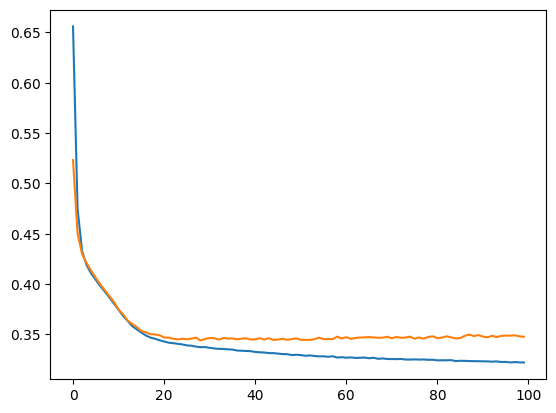

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

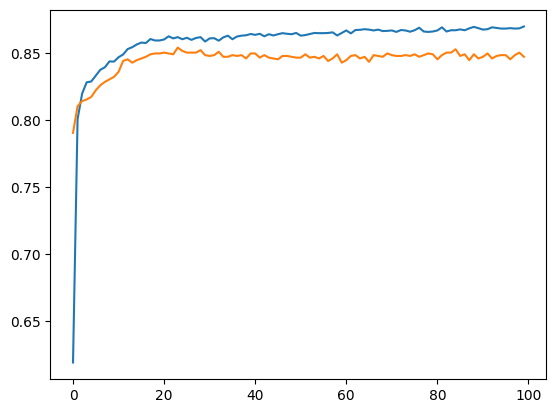

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])